In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.applications.vgg19 import VGG19
from keras.layers import Dense,Flatten,Input
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import cifar10

 準備Cifar10

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print("Shape of x_train is ",x_train.shape)
print("Shape of y_train is ",y_train.shape)
print("Shape of x_test  is ",x_test.shape)
print("Shape of y_test  is",y_test.shape)

170498071/170498071 [==============================] - 13s 0us/step
Shape of x_train is  (50000, 32, 32, 3)
Shape of y_train is  (50000, 1)
Shape of x_test  is  (10000, 32, 32, 3)
Shape of y_test  is (10000, 1)


轉乘48*48

In [ ]:
def resize_img(img):
    numberOfImage = img.shape[0]
    new_array = np.zeros((numberOfImage, 48,48,3))
    for i in range(numberOfImage):
        new_array[i] = cv2.resize(img[i,:,:,:],(48,48))
    return new_array

In [ ]:
x_train = resize_img(x_train)
x_test = resize_img(x_test)
print("New shape of x_train is ",x_train.shape)
print("New shape of x_test  is ",x_test.shape)


New shape of x_train is  (50000, 48, 48, 3)
New shape of x_test  is  (10000, 48, 48, 3)


In [ ]:
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

print("New shape of y_train is ",y_train.shape)
print("New shape of y_test  is ",y_test.shape)

New shape of y_train is  (50000, 10)
New shape of y_test  is  (10000, 10)


準備VGG19

In [ ]:
vgg = VGG19(include_top=False,weights="imagenet",input_shape=(48,48,3))

vgg.summary()

80134624/80134624 [==============================] - 4s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

In [ ]:
model = Sequential()

for layer in vgg.layers:
    model.add(layer)
    
for layer in model.layers:
    layer.trainable = False
    
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 12, 12, 256)       2

綜合評價模型

In [ ]:
model.compile(optimizer="RMSprop",loss="categorical_crossentropy",metrics=["accuracy"])

hist = model.fit(x_train,y_train,validation_split=0.15,epochs=20,batch_size=1000)

Epoch 1/20
43/43 [==============================] - 29s 410ms/step - loss: 8.9090 - accuracy: 0.4024 - val_loss: 5.5119 - val_accuracy: 0.4645
Epoch 2/20
43/43 [==============================] - 15s 338ms/step - loss: 4.5533 - accuracy: 0.4999 - val_loss: 5.2286 - val_accuracy: 0.4964
Epoch 3/20
43/43 [==============================] - 15s 345ms/step - loss: 3.5958 - accuracy: 0.5218 - val_loss: 6.1383 - val_accuracy: 0.3963
Epoch 4/20
43/43 [==============================] - 15s 349ms/step - loss: 3.3185 - accuracy: 0.5220 - val_loss: 3.4523 - val_accuracy: 0.5025
Epoch 5/20
43/43 [==============================] - 15s 360ms/step - loss: 3.0222 - accuracy: 0.5267 - val_loss: 4.7237 - val_accuracy: 0.4915
Epoch 6/20
43/43 [==============================] - 16s 369ms/step - loss: 2.9159 - accuracy: 0.5248 - val_loss: 2.7801 - val_accuracy: 0.4989
Epoch 7/20
43/43 [==============================] - 16s 378ms/step - loss: 2.7018 - accuracy: 0.5258 - val_loss: 2.3441 - val_accuracy: 0.5371

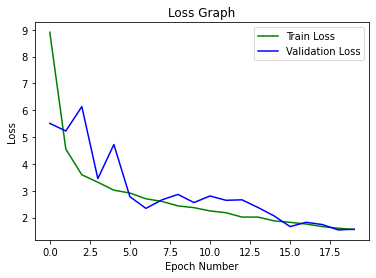

In [ ]:
plt.subplots(figsize=(6,4))
plt.plot(hist.epoch,hist.history["loss"],color="green",label="Train Loss")
plt.plot(hist.epoch,hist.history["val_loss"],color="blue",label="Validation Loss")
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Graph")
plt.show()

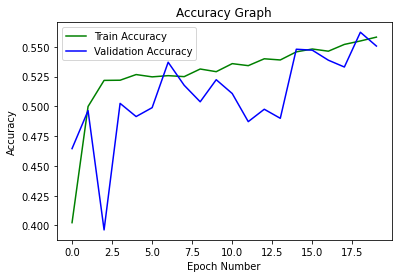

In [ ]:
plt.subplots(figsize=(6,4))
plt.plot(hist.epoch,hist.history["accuracy"],color="green",label="Train Accuracy")
plt.plot(hist.epoch,hist.history["val_accuracy"],color="blue",label="Validation Accuracy")
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Graph")
plt.show()

最終結果

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 6s 18ms/step - loss: 1.5605 - accuracy: 0.5539


[1.5604782104492188, 0.5539000034332275]

313/313 [==============================] - 5s 15ms/step


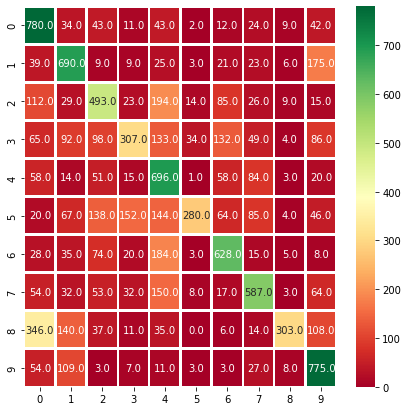

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predict_x=model.predict(x_test)
y_pred=np.argmax(predict_x,axis=1)

conf_matrix = confusion_matrix(y_pred=y_pred,y_true=[np.where(r==1)[0][0] for r in y_test])

plt.subplots(figsize=(7,7))
sns.heatmap(conf_matrix,annot=True,linewidths=1.5,fmt=".1f",cmap="RdYlGn")
plt.show()